Weights: [[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


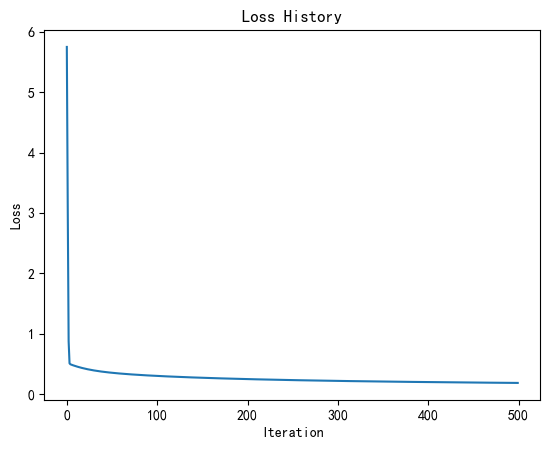

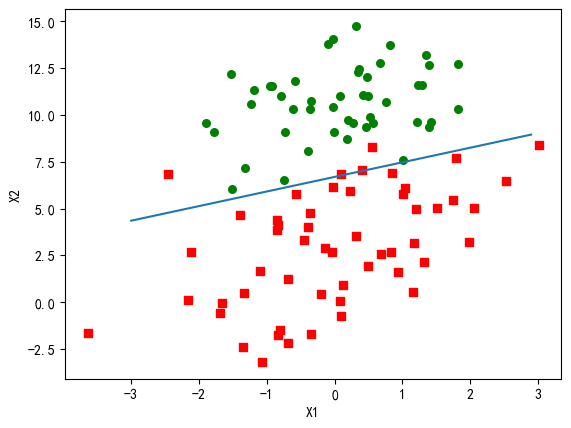

C:\Users\jc\AppData\Local\Temp\ipykernel_13660\256296674.py:15: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+exp(-inX))


0.34328358208955223
Error rate: 0.34328358208955223


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open(r'D:\ch05\testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.array(dataMatIn)             # convert to NumPy array
    labelMat = np.array(classLabels).reshape(-1, 1) # convert to NumPy array
    m, n = dataMatrix.shape
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    loss_history = []  # 用于保存损失历史记录
    for k in range(maxCycles):
        h = sigmoid(dataMatrix.dot(weights))
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose().dot(error)
        
        # 计算损失并保存到列表中
        loss = log_loss(labelMat, h)  # 使用交叉熵损失
        loss_history.append(loss)
    return weights, loss_history


def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    
    # 将权重数组转换为一维数组
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))  # 使用列表
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex))) # 使用 len(dataIndex) 来获取索引范围
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])  # 从列表中删除已使用的索引
    return weights

def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('D:\ch05\horseColicTraining.txt'); frTest = open('D:\ch05\horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print(errorRate)
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()

def plotLossHistory(loss_history):
    plt.plot(range(len(loss_history)), loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.show()

def main():
    dataMat, labelMat = loadDataSet()
    weights, loss_history = gradAscent(dataMat, labelMat)
    print("Weights:", weights)
    plotLossHistory(loss_history)
    plotBestFit(weights)
    error_rate = colicTest()
    print("Error rate:", error_rate)
    
if __name__ == "__main__":
    main()


In [12]:
!pip install tensorflow

图像数据形状: (50000, 3072)
标签数据形状: (50000,)


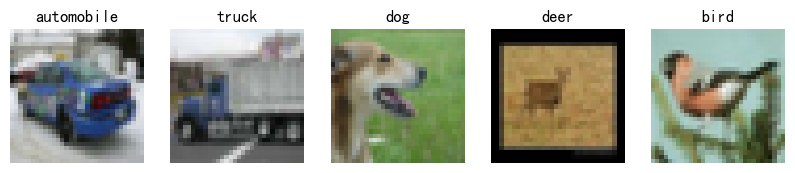

In [19]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 定义函数来读取 CIFAR-10 数据
def load_cifar_batch(file_path):
    with open(file_path, 'rb') as f:
        # 使用 pickle 加载数据
        cifar_batch = pickle.load(f, encoding='bytes')
        # 获取图像数据和标签
        images = cifar_batch[b'data']
        labels = cifar_batch[b'labels']
        return images, labels

# 定义函数来读取所有 CIFAR-10 数据批次
def load_cifar_data(data_dir):
    images = []
    labels = []
    for i in range(1, 6):  # CIFAR-10 数据集有 5 个批次
        file_path = f"{data_dir}/data_batch_{i}"
        batch_images, batch_labels = load_cifar_batch(file_path)
        images.append(batch_images)
        labels.extend(batch_labels)
    # 将图像数据和标签合并为一个数组
    images = np.vstack(images)
    labels = np.array(labels)
    return images, labels

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
data_dir = "D:\cifar-10-batches-py"
images, labels = load_cifar_data(data_dir)
print("图像数据形状:", images.shape)
print("标签数据形状:", labels.shape)

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']
num_images_to_show = 5
random_indices = np.random.randint(0, images.shape[0], size=num_images_to_show)

# 可视化图像和对应的标签
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    image = images[idx].reshape(3, 32, 32).transpose(1, 2, 0)
    label = cifar_labels[labels[idx]]
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 将图像数据展平
X = images.reshape(images.shape[0], -1)
y = labels

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 KNN 分类器
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# 训练分类器
knn_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = knn_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("KNN 分类器在测试集上的准确率:", accuracy)


KNN 分类器在测试集上的准确率: 0.3325


In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 构建 One-vs-One 分类器
ovo_classifier = OneVsOneClassifier(SVC(kernel='linear'))

# 训练分类器
ovo_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_ovo = ovo_classifier.predict(X_test)

# 计算准确率
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print("One-vs-One 分类器在测试集上的准确率:", accuracy_ovo)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# 构建 One-vs-All 分类器
ova_classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# 训练分类器
ova_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_ova = ova_classifier.predict(X_test)

# 计算准确率
accuracy_ova = accuracy_score(y_test, y_pred_ova)
print("One-vs-All 分类器在测试集上的准确率:", accuracy_ova)


In [ ]:
from sklearn.linear_model import LogisticRegression

# 构建 Softmax with Cross-Entropy Loss 分类器
softmax_classifier = LogisticRegression(multi_class='multinomial', max_iter=1000)

# 训练分类器
softmax_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_softmax = softmax_classifier.predict(X_test)

# 计算准确率
accuracy_softmax = accuracy_score(y_test, y_pred_softmax)
print("Softmax with Cross-Entropy Loss 分类器在测试集上的准确率:", accuracy_softmax)
